## PV parameter extraction from a Si solar cell and µSMU

- Measure the JV-curve of solar cells using the micro-SMU under light
- Import data into the Jupyter Notebok and analyse using python3
- Plot the JV curve
- Extract parameters of the solar cell: Voc, Jsc, FF, Vmax,  Imax 

Note: The polycristaline Si mini-modules were adquired from Aliexpress (Cheap devices) Parameters:  Voc = 2V , I = 40 mA (4 mA each, 40 mA total at 1000 W/m2)  url: https://es.aliexpress.com/item/4000512203943.html 

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
# Import data into Jupyter Notebook 

filename = 'data/celdaSi_ligh_near_01.dat' # Under Light (White LED lamp with 500 W/m2 irradiance)
np_data = np.loadtxt(filename, delimiter=',', skiprows =2) # Import as np.ndarray

In [3]:
#Separate data in two arrays - V and J 

V = np_data[:,0] # voltage is in [V]
J = np_data[:,1] # current density is in [mA/cm2]

In [4]:
# Find Voc_approx and Jsc_approx

a = [J > 0 ] #Voc_approx is located when J > 0 
Voc_approx = np.min(V[(J>0)])
Voc_approx = round(Voc_approx,4) 

b = (V < 0)  #Jsc_approx is located when V < 0 
Jsc_approx = np.max(J[(V<0)])
Jsc_approx = round(Jsc_approx,4)

In [5]:
# Find the approx Fill Factor 

P = J*V # mW/cm2
P_min = np.min(P)
FF_approx = P_min/(Voc_approx*Jsc_approx)
FF_approx = round(FF_approx,4)

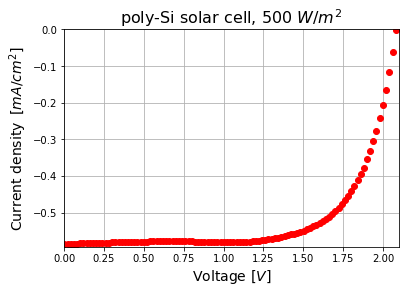

In [6]:
## Plot the JV curve with the approximated values of Voc and Jsc

# Print data inside the Voc anc Jsc limits 

plt.plot(V,J,'or')
plt.ylim(np.min(J),0)
plt.xlim(0,Voc_approx) # Plot the 4th quadrant from 0 to Voc_approx

plt.title('poly-Si solar cell, 500 $W/m^2$', fontsize =16)
plt.ylabel('Current density $ \:[mA/cm^2]$', fontsize=14)
plt.xlabel('Voltage $[V]$', fontsize=14)

plt.grid()
plt.show()

In [7]:
#  This are the approximate values extracted from the light JV-curve 

print (f'Voc_approx = {Voc_approx} V')
print (f'Jsc_approx = {Jsc_approx} mA/cm2')
print (f'FF_approx  = {FF_approx}')

Voc_approx = 2.0999 V
Jsc_approx = -0.5867 mA/cm2
FF_approx  = 0.6888


In [8]:
## Refine the Voc trough linear fitting 

#Import data near Voc to calculate de series resistance (slope)

Vs = V[(V < (Voc_approx + 0.04)) & (V > (Voc_approx - 0.04))]
Js = J[(V < (Voc_approx + 0.04)) & (V > (Voc_approx - 0.04))]

#add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. 
Vs = sm.add_constant(Vs) 

# Create the model for the regression  and show results 

model = sm.OLS(Js, Vs) #Take care from the Js , Vs input order
results = model.fit()

# Extract the y = mx+b coefficients for Voc calculation 

b1 = results.params[0]
m1 = results.params[1]

# Linnear fitting of Voc  when mx+b = 0

Voc_fit = -b1/m1
Voc_fit = round(Voc_fit,4) 

# Calculation of series resistance (Rs) from the linear model 

Rs = 1/(m1*1e-3)
Rs = round(Rs,2) # Series resistance 


In [20]:
## Refine the Jsc trough linear fitting 

#Import data near Voc to calculate de series resistance (slope)

Vp = V[(V < (0 + 0.04)) & (V > (0 - 0.04))]
Jp = J[(V < (0 + 0.04)) & (V > (0 - 0.04))]

#add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. 
Vp = sm.add_constant(Vp)  

# Create the model for the regression  and show results 

model_sc = sm.OLS(Jp, Vp)
results_sc = model_sc.fit()

# Extract the y = mx+b coefficients for Voc calculation 

b1 = results_sc.params[0]
m1 = results_sc.params[1]

# Linnear fitting of Voc  when mx+b = 0

Jsc_fit = b1
Jsc_fit = round(Jsc_fit,4) 

# Calculation of series resistance (Rs) from the linear model 

Rp = 1/(m1*1e-3)
Rp = round(Rp,2) # Series resistance 

In [21]:
# Find the accurate Fill Factor (FF)

P = J*V # mW/cm2
P_min = np.min(P)
FF_fit = P_min/(Voc_fit*Jsc_fit)
FF_fit = round(FF_fit,4)

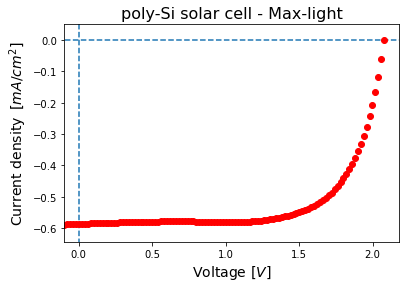

In [24]:
# Plot the whole J(V) curve and use vline and hline to delimite the 4-cuadrant
# Print data inside the Voc_fit anc Jsc_fit limits 

plt.plot(V,J,'or')
plt.ylim(np.min(J)-0.05,0+0.05)  #This y_limit can be modify for your values
plt.xlim(0-0.1,Voc_fit+0.1)          #This x_limit can be modify for your values

plt.title('poly-Si solar cell', fontsize =16)
plt.ylabel('Current density $ \:[mA/cm^2]$', fontsize=14)
plt.xlabel('Voltage $[V]$', fontsize=14)

plt.vlines(0, -0.7, 0.1, linestyle="dashed")
plt.hlines(0 , 0-0.2, Voc_fit+0.2, linestyle="dashed")

#plt.grid()
plt.show()

In [22]:
#This are the accurate  PV parameters from the light JV-curve

print (f'Voc_fit = {Voc_fit} V')
print (f'Jsc_fit = {Jsc_fit} mA/cm2')
print (f'FF_fit  = {FF_fit}')

Voc_fit = 2.0794 V
Jsc_fit = -0.5863 mA/cm2
FF_fit  = 0.696


In [ ]:
Rs